In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# https://stackoverflow.com/questions/19397719/could-numpy-random-poisson-be-used-to-add-poisson-noise-to-images

In [408]:
num_indep = 2

n_sample = 100

np.random.seed(42)
coeff_factor = 40
coeffs = np.random.rand(num_indep)*coeff_factor
# coeffs = [2,10]

np.random.seed(0)
noise_factor = 10
noise_coeffs = np.random.rand(num_indep)*noise_factor



In [409]:
# X_base = np.ones((n_sample,num_indep))
np.random.seed(1)
X_base = np.random.rand(n_sample,num_indep)*10

np.random.seed(2)
noise = gen_noise(X_base, noise_coeffs, 'poisson')

X = X_base + noise

In [494]:
def gen_noise(input_X,noise_coeff,noise_type='normal', seed=99): 
#     TODO: noise_coeff as a vector -> different for each channel 
    np.random.seed(seed)
    shape = input_X.shape
    if noise_type=='normal':
        noise = np.random.normal(0,noise_coeff,shape)
    elif noise_type=='poisson':
        noise = np.random.poisson(lam=input_X,size=None)
    elif noise_type=='sin':
        n_pi = 2 
        samples = np.linspace(0, n_pi*np.pi, num=shape[0], endpoint=False)
        noise = noise_coeff*np.tile(np.sin(samples), (shape[1],1)).T
    elif noise_type=='linear_inc': 
        samples = np.linspace(0, shape[0], num=shape[0], endpoint=False)
        noise = noise_coeff*np.tile(samples/shape[0], (shape[1],1)).T
    return noise

def theoretical_function_linear(X, coeffs, y_noise_coeff, noise_type='normal'):
    noise_y = gen_noise(X[:,0],[y_noise_coeff],noise_type)
    Y_base = (X*coeffs).sum(axis=1)
    print('mean abs Y: ',(np.abs(Y_base)).mean())
    print('mean abs noise: ',(np.abs(noise_y)).mean())
    print('mean SNR: ',(np.abs(Y_base/noise_y)).mean())
    return Y_base+noise_y

In [421]:
shape = X_base.shape

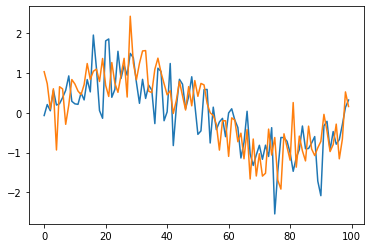

In [464]:
plt.plot(gen_noise(X_base, 1, 'sin')+gen_noise(X_base, 0.5, 'normal'))

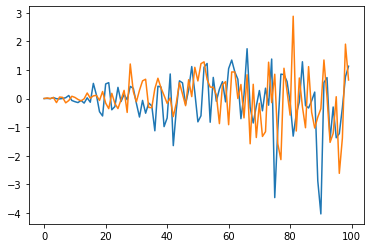

In [495]:
plt.plot(gen_noise(X_base, 3, 'linear_inc')*gen_noise(X_base, 0.5, 'normal'))

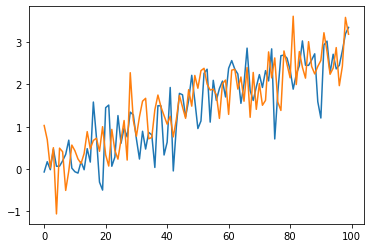

In [496]:
plt.plot(gen_noise(X_base, 3, 'linear_inc')+gen_noise(X_base, 0.5, 'normal'))

___

In [408]:
num_indep = 2

n_sample = 100

np.random.seed(42)
coeff_factor = 40
coeffs = np.random.rand(num_indep)*coeff_factor
# coeffs = [2,10]

np.random.seed(0)
noise_factor = 10
noise_coeffs = np.random.rand(num_indep)*noise_factor



In [409]:
# X_base = np.ones((n_sample,num_indep))
np.random.seed(1)
X_base = np.random.rand(n_sample,num_indep)*10

np.random.seed(2)
noise = gen_noise(X_base, noise_coeffs, 'poisson')

X = X_base + noise

In [410]:
y = theoretical_function_linear(X, coeffs, 100)

mean abs Y:  551.052091545861
mean abs noise:  77.86855758461178
mean SNR:  20.47866936795167


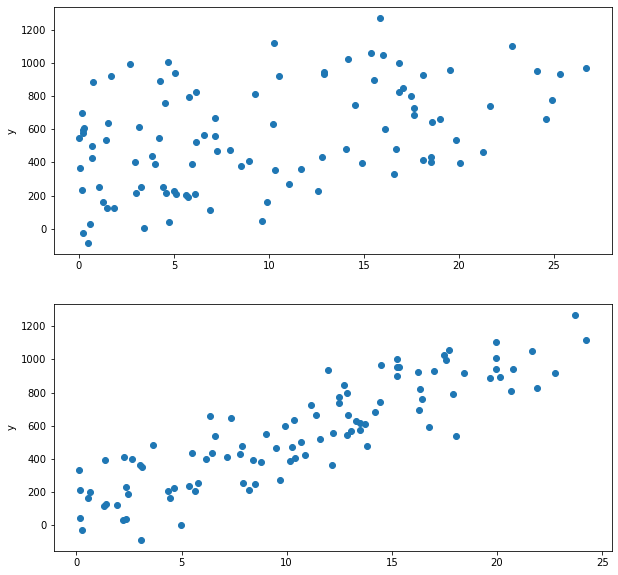

In [411]:
if X.shape[1] == 1: 
    nr = X.shape[1]+1
else: 
    nr = X.shape[1]

f, ax = plt.subplots(nrows=nr, ncols=1, figsize=(10,10))
for i in range(X.shape[1]): 
    ax[i].scatter(X[:,i],y)
    ax[i].set_ylabel('y')

___

In [412]:
from sklearn import datasets, linear_model
import statsmodels.api as sm

thershold = int(len(X)*0.8)
X_train, X_test = X[:thershold], X[thershold:]
y_train, y_test = y[:thershold], y[thershold:]

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
fitted = model.predict(X_train)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     439.3
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.38e-49
Time:                        23:34:26   Log-Likelihood:                -599.86
No. Observations:                 100   AIC:                             1206.
Df Residuals:                      97   BIC:                             1214.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.4976     22.375     -1.050      0.2

In [413]:
model.coef_

array([14.77291257, 42.11845711])

In [414]:
coeffs

array([14.98160475, 38.02857226])

In [415]:
residuals = fitted - y_train
print("Expected error estimate: {}".format(sum(residuals)/len(residuals)))

Expected error estimate: 2.7249313916399843e-13


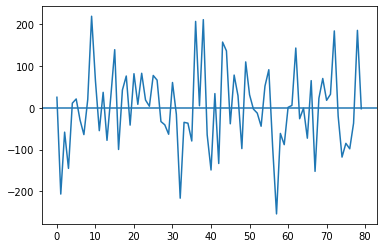

In [417]:
plt.plot(residuals)
plt.gca().axhline([0])

(array([ 1.,  1.,  1.,  0.,  3.,  2.,  4.,  5.,  8.,  9.,  9., 10.,  6.,
         6.,  5.,  1.,  3.,  1.,  2.,  3.]),
 array([-253.81580696, -230.17881131, -206.54181566, -182.90482001,
        -159.26782436, -135.63082871, -111.99383306,  -88.35683741,
         -64.71984176,  -41.08284611,  -17.44585046,    6.19114519,
          29.82814084,   53.46513649,   77.10213214,  100.73912779,
         124.37612344,  148.01311909,  171.65011474,  195.28711039,
         218.92410604]),
 <BarContainer object of 20 artists>)

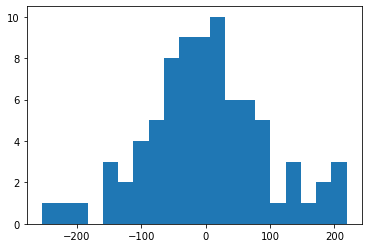

In [416]:
plt.hist(residuals, bins=20)

___

In [381]:
import pandas as pd

In [382]:
df = pd.DataFrame(X, columns=['x'+str(i) for i in range(X.shape[1])])

In [383]:
df['y'] = y

In [384]:
df

,x0,x1,y
0,4.170220,7.203245,322.169825
1,0.001144,3.023326,320.712070
2,1.467559,0.923386,85.427631
3,1.862602,3.455607,292.297777
4,3.967675,5.388167,248.884261
...,...,...,...
99995,4.532758,4.274854,274.441568
99996,4.815250,7.039599,415.613373
99997,0.860933,5.210685,185.066339
99998,3.153091,4.412123,210.234786
